<a href="https://colab.research.google.com/github/kk-shetty/data_science_ik/blob/main/assingments/eda_and_feature_engineering/LeetCode_Dataset_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Please make a copy of this notebook and try solving the below questions in your notebook copy. Solutions for these will be discussed in the assignment review session on <day> post which, we will also share the solution notebook.


# **Good Luck**

##LeetCode DataSet
It contains the following info:

- **id**: problem id
- **title**: problem name
- **description**: problem description
- **is_premium**: whether the questions requires a premium account
- **difficulty**: easy, medium, or hard
- **solution_link**: how often the answer submitted is correct
- **acceptance_rate**: how often the answer submitted is correct
- **frequency**: how often the problem is attempted
- **url**: url to the problem
- **discuss_count**: how many comments are submitted by users
- **accepted**: how many times the answer was accepted
- **submissions**: how many times the answer was submitted
- **companies**: which companies were tagged as having asked this specific problem
- **related_topics**: related topics to the current problem
- **likes**: how many likes the problem got
- **dislikes**: how many dislikes the problem got
- **rating**: likes / (likes + dislikes)
- **asked_by_faang**: whether or not the question was asked by facebook, apple, amazon, google, or netflix
- **similar_questions**: similar problems with problem name, slug, and difficulty


In [41]:
#Import necessary libraries
from google.colab import drive
import os
import pandas as pd
import seaborn as sns

In [25]:
## Reading from the file stored at Google Drive

# Mount Google Drive into collab
drive.mount('/content/gdrive', force_remount=True)

# Change the OS path to point to the right folder
os.chdir('/content/gdrive/MyDrive/')

#Read dataset into Pandas dataframe
leetcode_df = pd.read_csv('leetcode_dataset.tsv',sep='\t')

Mounted at /content/gdrive


In [27]:
# Verify the data
leetcode_df.sample(n=5)

,id,title,description,is_premium,difficulty,solution_link,acceptance_rate,frequency,url,discuss_count,accepted,submissions,companies,related_topics,likes,dislikes,rating,asked_by_faang,similar_questions
808,809,Expressive Words,Sometimes people repeat letters to represent e...,0,Medium,/articles/expressive-words,46.4,16.9,https://leetcode.com/problems/expressive-words,368,65.5K,141.1K,Google,String,463,1116,29,1,NaN
1625,1626,Best Team With No Conflicts,You are the manager of a basketball team. For ...,0,Medium,NaN,38.4,17.7,https://leetcode.com/problems/best-team-with-n...,127,10.5K,27.4K,Uber,Dynamic Programming,411,18,96,0,NaN
1190,1191,K-Concatenation Maximum Sum,Given an integer array `arr` and an integer `k...,0,Medium,NaN,25.0,5.7,https://leetcode.com/problems/k-concatenation-...,197,16.6K,66.2K,American Express,Dynamic Programming,499,46,92,0,NaN
850,851,Loud and Rich,"In a group of N people (labelled `0, 1, 2, ......",0,Medium,/articles/loud-and-rich,52.9,8.9,https://leetcode.com/problems/loud-and-rich,184,15.1K,28.5K,Amazon,Depth-first Search,318,334,49,1,NaN
1554,1555,Bank Account Summary,SQL Schema,1,Medium,NaN,53.0,0.0,https://leetcode.com/problems/bank-account-sum...,152,5.4K,10.2K,Optum,NaN,57,13,81,0,NaN


##Question 1
####What is the Shape of the dataset?

In [28]:
#Solution 1(your code here)
leetcode_df.shape

(1825, 19)

##Question 2
####What is the datatype of **accepted** and **acceptance rate** fields?

In [30]:
#Solution 2(your code here)
leetcode_df[['accepted','acceptance_rate']].info()

# accepted -> object (string)
# acceptance_rate -> float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   accepted         1825 non-null   object 
 1   acceptance_rate  1825 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.6+ KB
None


##Question 3
####What is the number of missing values correponsing to each field?

In [32]:
#Solution 3(your code here)
leetcode_df.isna().sum()

id                      0
title                   0
description             0
is_premium              0
difficulty              0
solution_link         838
acceptance_rate         0
frequency               0
url                     0
discuss_count           0
accepted                0
submissions             0
companies              76
related_topics        254
likes                   0
dislikes                0
rating                  0
asked_by_faang          0
similar_questions    1080
dtype: int64

##Question 4
####What is the cardinality of the columns?

In [38]:
#Solution 4(your code here)
leetcode_df.nunique()

id                   1825
title                1825
description          1670
is_premium              2
difficulty              3
solution_link         987
acceptance_rate       576
frequency             619
url                  1825
discuss_count         642
accepted             1098
submissions          1236
companies             691
related_topics        320
likes                1161
dislikes              603
rating                 94
asked_by_faang          2
similar_questions     689
dtype: int64

##Question 5
####Give 2 inferences from the .describe() of the dataset.

In [39]:
#Solution 5(your code here)
leetcode_df.describe()

#1 - 21.8% of the questions are premium
#2 - 53% is the average acceptance rate with 95.6% being highest and 13.9% being the lowest
#3 - Question with highest likes has 20,217 likes
#4 - 67% of these questions are asked by faang companies

,id,is_premium,acceptance_rate,frequency,discuss_count,likes,dislikes,rating,asked_by_faang
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,913.000000,0.218082,53.139616,21.113041,421.435068,1050.534795,279.010959,77.391233,0.671233
std,526.976438,0.413057,14.778411,22.364741,330.583617,1512.674013,608.489206,23.317515,0.469894
min,1.000000,0.000000,13.900000,0.000000,9.000000,2.000000,0.000000,7.000000,0.000000
25%,457.000000,0.000000,42.400000,3.100000,150.000000,217.000000,32.000000,67.000000,0.000000
50%,913.000000,0.000000,51.600000,13.500000,292.000000,516.000000,92.000000,88.000000,1.000000
75%,1369.000000,0.000000,62.800000,31.800000,663.000000,1200.000000,239.000000,95.000000,1.000000
max,1825.000000,1.000000,95.600000,100.000000,999.000000,20217.000000,8900.000000,100.000000,1.000000


##Question 6
####Plot the outliners in the dataset.

<Axes: xlabel='likes'>

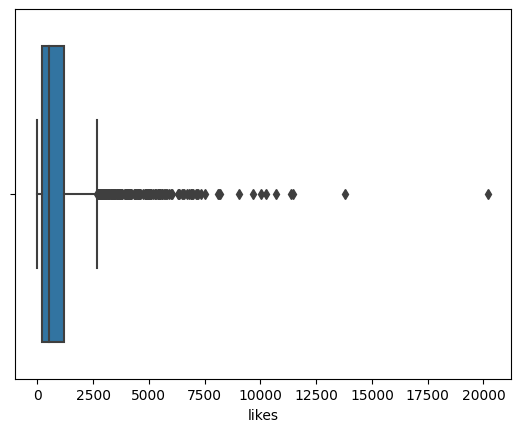

In [42]:
#Solution 6(your code here)
sns.boxplot(x=leetcode_df.likes)

##Question 7
####**is_premium**, **difficulty** , **rating** and **asked_by_faang** are four important parameters in the dataset. Plot/calculate all possible relation between them and explain the relationship.

In [43]:
#Solution 7(your code here)

0         Easy
1       Medium
2       Medium
3         Hard
4       Medium
         ...  
1820      Easy
1821      Easy
1822    Medium
1823    Medium
1824      Hard
Name: difficulty, Length: 1825, dtype: object

##Question 8
####Plot top 20 companies whose problems are listed in this dataset.

In [ ]:
#Solution 8(your code here)